Import necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('spams.csv')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 column
cols = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=cols, inplace=True)
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# renaming column
df.rename(columns={'v1': "target", 'v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

#### encoding the labels

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [9]:
# check for duplicate
df.duplicated().sum()

403

##### there are 403 duplicated values which  will be dropped before proceeding

In [10]:
df = df.drop_duplicates(keep='first')

# check for duplicate
df.duplicated().sum()

0

### EDA

data is imbalanced

In [11]:
target_counts = df['target'].value_counts()
target_counts

target
0    4516
1     653
Name: count, dtype: int64

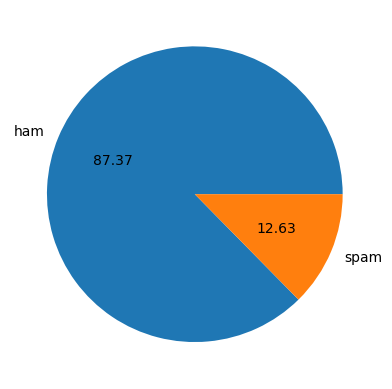

In [12]:
plt.pie(target_counts, labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [14]:
df['character_count'] = df['text'].apply(len)

C:\Users\USER\AppData\Local\Temp\ipykernel_13008\3638323256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character_count'] = df['text'].apply(len)


In [15]:
df.head()

,target,text,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\USER\AppData\Local\Temp\ipykernel_13008\623176076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [17]:
df['sentences_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\USER\AppData\Local\Temp\ipykernel_13008\875989304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [18]:
df[['character_count', 'word_count', 'sentences_count']].describe()


,character_count,word_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# ham messages describtion
df[df['target'] == 0][['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# spam messages describtion
df[df['target'] == 1][['character_count', 'word_count', 'sentences_count']].describe()

,character_count,word_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text(0.5, 1.0, 'ham and spam character count plot')

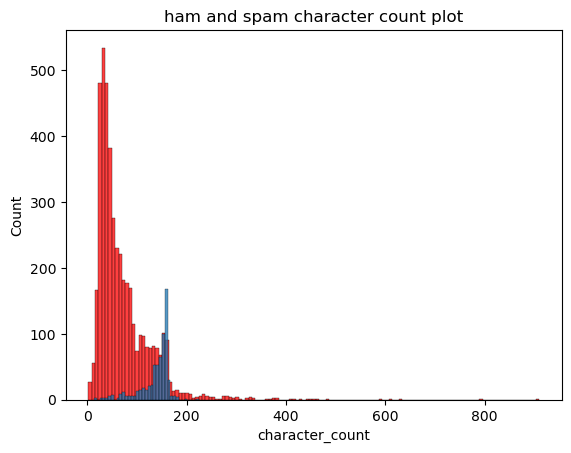

In [21]:
sns.histplot(df[df['target'] == 0]['character_count'], label='ham', color='red')
sns.histplot(df[df['target'] == 1]['character_count'], label='spam')
plt.title('ham and spam character count plot')

<Axes: xlabel='word_count', ylabel='Count'>

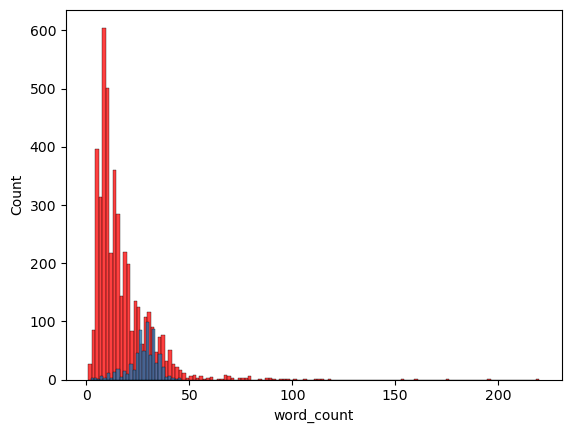

In [22]:
sns.histplot(df[df['target'] == 0]['word_count'], label='ham', color='red')
sns.histplot(df[df['target'] == 1]['word_count'], label='spam')

<Axes: xlabel='sentences_count', ylabel='Count'>

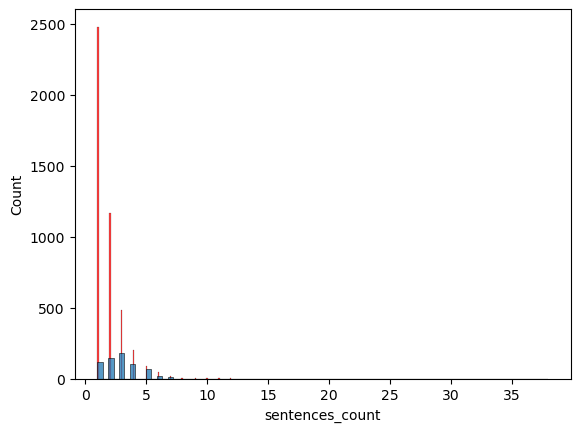

In [23]:
sns.histplot(df[df['target'] == 0]['sentences_count'], label='ham', color='red')
sns.histplot(df[df['target'] == 1]['sentences_count'], label='spam')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


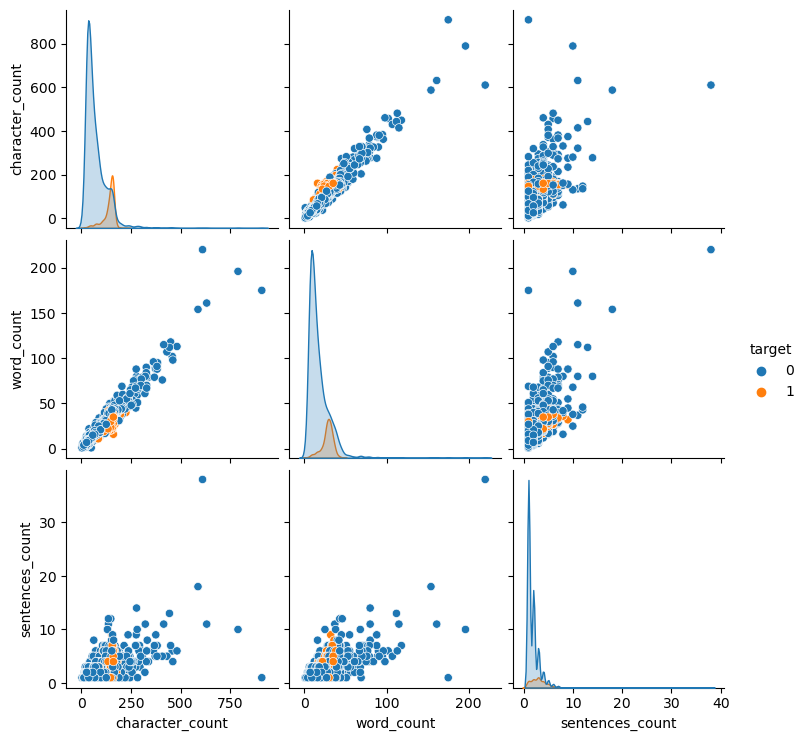

In [24]:
sns.pairplot(df, hue='target')

### Data preprocessing
* Lowercase text
* Tokenization
* Reemove Special character
* r emoving stop words and punctuation

In [25]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer




ps = PorterStemmer()

def textTransformer(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
                 
    return " ".join(y)


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [27]:
textTransformer('I AM % coming%')

'come'

In [28]:
#applying transformer to apply text.
df['transformed_text'] = df['text'].apply(textTransformer)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_13008\7721450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(textTransformer)


,target,text,character_count,word_count,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')


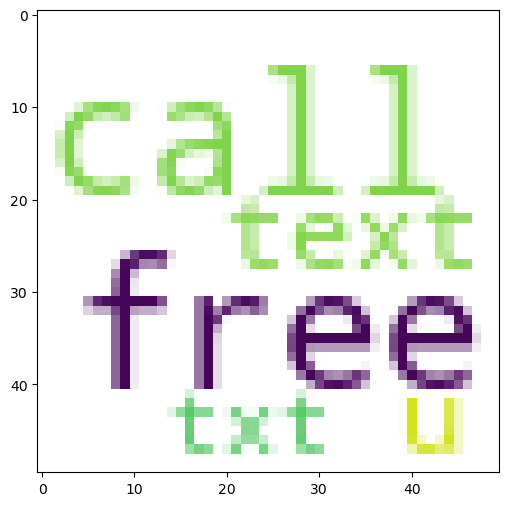

In [30]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)  # Use interpolation for smoother display
# plt.axis('off')  # Turn off axis labels
plt.show()


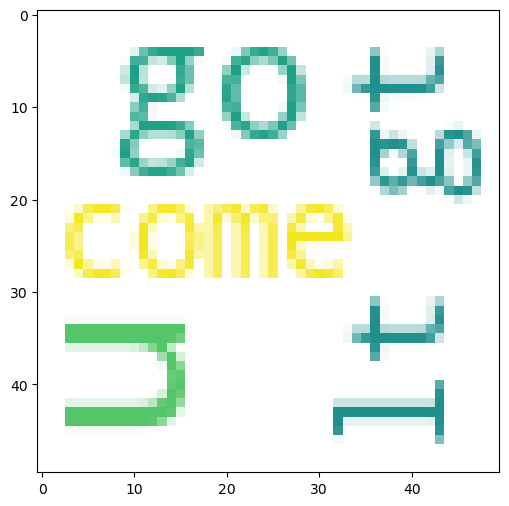

In [31]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)  # Use interpolation for smoother display
# plt.axis('off')  # Turn off axis labels
plt.show()

In [32]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [33]:
len(spam_corpus)

9939

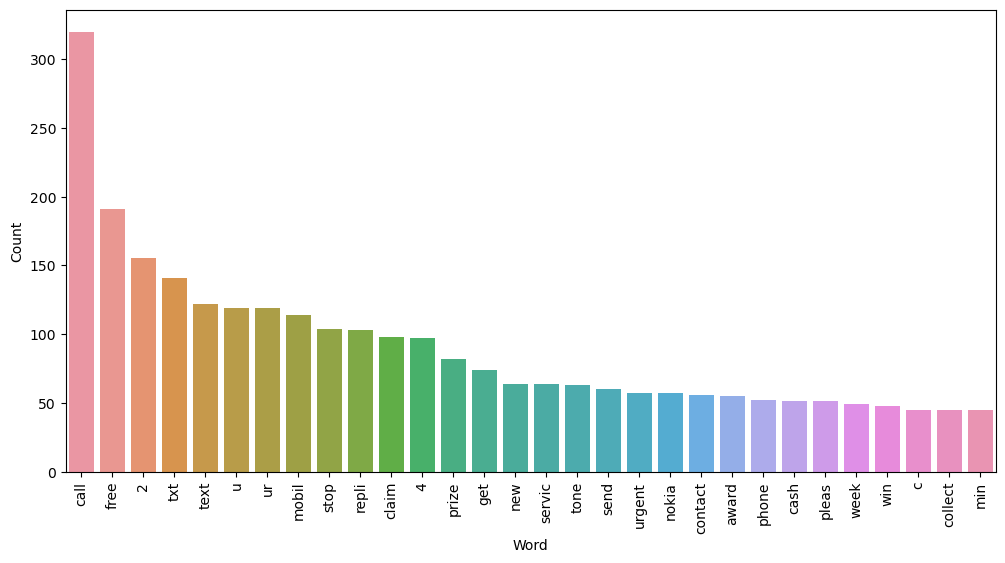

In [34]:
from collections import Counter
# Get the most common words and their counts
word_counts = Counter(spam_corpus).most_common(30)

# Convert the word counts to a DataFrame
most_common_words_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=most_common_words_df)
plt.xticks(rotation='vertical')  
plt.show()
  

In [35]:
ham_corpus = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
 

In [36]:
len(ham_corpus)

35404

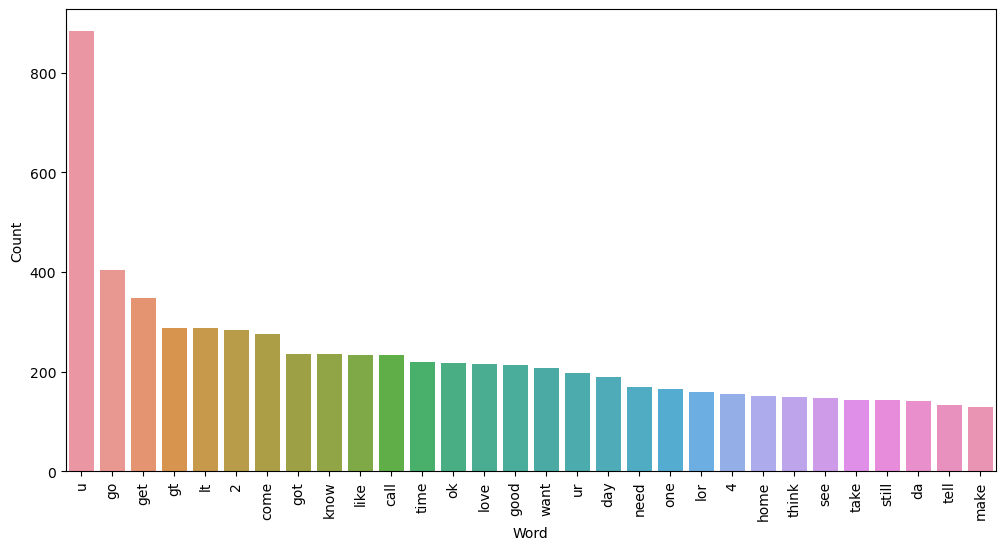

In [37]:
# Get the most common words and their counts
word_counts = Counter(ham_corpus).most_common(30)

# Convert the word counts to a DataFrame
most_common_words_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=most_common_words_df)
plt.xticks(rotation='vertical') 
plt.show()

### Model building

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [39]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
                        
X.shape

(5169, 3000)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [41]:
# X = np.hstack((X,df['character_count'].values.reshape(-1,1)))

In [42]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

#### unscaled model

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split

def evaluate_naive_bayes_classifier(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate and print accuracy, confusion matrix, and precision
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f'Classifier: {type(clf).__name__}')
    print('Accuracy Score:', accuracy)
    print('Confusion Matrix:\n', conf_matrix)
    print('Precision Score:', precision)

# Create instances of the Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Evaluate each classifier
evaluate_naive_bayes_classifier(gnb, X, y)
evaluate_naive_bayes_classifier(mnb, X, y)
evaluate_naive_bayes_classifier(bnb, X, y)


Classifier: GaussianNB
Accuracy Score: 0.8607350096711799
Confusion Matrix:
 [[769 120]
 [ 24 121]]
Precision Score: 0.5020746887966805
Classifier: MultinomialNB
Accuracy Score: 0.9729206963249516
Confusion Matrix:
 [[888   1]
 [ 27 118]]
Precision Score: 0.9915966386554622
Classifier: BernoulliNB
Accuracy Score: 0.9729206963249516
Confusion Matrix:
 [[884   5]
 [ 23 122]]
Precision Score: 0.9606299212598425


In [44]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  

# Instantiate classifier objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

# Store classifier instances in the dictionary
clfs = {
    'SVC': svc,
    'KNC': knc,
    'MNB': mnb,
    'LRC': lrc,
    'DTC': dtc,
    'RFC': rfc,
    'ABC': abc,
    'BC': bc,
    'ETC': etc, 
    'GBC': gbc,
    'XGB': xgb
}


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision


accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For:', name)
    print('Accuracy score:', current_accuracy)
    print('Precision:', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For: SVC
Accuracy score: 0.97678916827853
Precision: 0.9548872180451128
For: KNC
Accuracy score: 0.9168278529980658
Precision: 1.0
For: MNB
Accuracy score: 0.9729206963249516
Precision: 0.9915966386554622
For: LRC
Accuracy score: 0.9468085106382979
Precision: 0.8688524590163934
For: DTC
Accuracy score: 0.9342359767891683
Precision: 0.8347826086956521
For: RFC
Accuracy score: 0.971953578336557
Precision: 0.9754098360655737
For: ABC
Accuracy score: 0.9506769825918762
Precision: 0.8671875
For: BC
Accuracy score: 0.9622823984526112
Precision: 0.8840579710144928
For: ETC
Accuracy score: 0.9777562862669246
Precision: 0.9841269841269841
For: GBC
Accuracy score: 0.9468085106382979
Precision: 0.96875
For: XGB
Accuracy score: 0.9680851063829787
Precision: 0.9375


In [55]:
performance_df = pd.DataFrame({'Classifier': list(clfs.keys()),
                               'Accuracy': accuracy_scores,
                               'Precision': precision_scores})

performance_df

,Classifier,Accuracy,Precision
0,SVC,0.976789,0.954887
1,KNC,0.916828,1.000000
2,MNB,0.972921,0.991597
3,LRC,0.946809,0.868852
4,DTC,0.934236,0.834783
5,RFC,0.971954,0.975410
6,ABC,0.950677,0.867188
7,BC,0.962282,0.884058
8,ETC,0.977756,0.984127
9,GBC,0.946809,0.968750


#### Scaled Model

In [56]:
def evaluate_naive_bayes_scaled_classifier(clf, X_scaled, y):
    X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_scaled_test)

    # Calculate and print accuracy, confusion matrix, and precision
    scaled_accuracy = accuracy_score(y_test, y_pred)
    scaled_conf_matrix = confusion_matrix(y_test, y_pred)
    scaled_precision = precision_score(y_test, y_pred)

    print(f'Classifier: {type(clf).__name__}')
    print('Accuracy Scaled:', scaled_accuracy)
    print('scaled Confusion Matrix:\n', scaled_conf_matrix)
    print('Precision Scaled:', scaled_precision)
    
# Create instances of the Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Evaluate each classifier
evaluate_naive_bayes_scaled_classifier(gnb, X_scaled, y)
evaluate_naive_bayes_scaled_classifier(mnb, X_scaled, y)
evaluate_naive_bayes_scaled_classifier(bnb, X_scaled, y)

Classifier: GaussianNB
Accuracy Scaled: 0.8588007736943907
scaled Confusion Matrix:
 [[765 124]
 [ 22 123]]
Precision Scaled: 0.4979757085020243
Classifier: MultinomialNB
Accuracy Scaled: 0.9748549323017408
scaled Confusion Matrix:
 [[880   9]
 [ 17 128]]
Precision Scaled: 0.9343065693430657
Classifier: BernoulliNB
Accuracy Scaled: 0.9729206963249516
scaled Confusion Matrix:
 [[884   5]
 [ 23 122]]
Precision Scaled: 0.9606299212598425


In [57]:
# train_classifier(svc, X_train,y_train,X_test,y_test)

In [58]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def train_scaled_classifier(clf, X_scaled_train, y_train, X_scaled_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision


Accuracy_scaled = []
Precision_scaled = []

for name, clf in clfs.items():
    current_scaled_accuracy, current_scaled_precision = train_classifier(clf, X_scaled_train, y_train, X_scaled_test, y_test)
    
    print('For:', name)
    print('Accuracy scaled:', current_scaled_accuracy)
    print('Precision scaled:', current_scaled_precision)

    Accuracy_scaled.append(current_scaled_accuracy)
    Precision_scaled.append(current_scaled_precision)

For: SVC
Accuracy scaled: 0.9709864603481625
Precision scaled: 0.9136690647482014
For: KNC
Accuracy scaled: 0.9168278529980658
Precision scaled: 1.0
For: MNB
Accuracy scaled: 0.9777562862669246
Precision scaled: 0.9552238805970149
For: LRC
Accuracy scaled: 0.9622823984526112
Precision scaled: 0.9206349206349206
For: DTC
Accuracy scaled: 0.9332688588007737
Precision scaled: 0.8275862068965517
For: RFC
Accuracy scaled: 0.971953578336557
Precision scaled: 0.9754098360655737
For: ABC
Accuracy scaled: 0.9506769825918762
Precision scaled: 0.8671875
For: BC
Accuracy scaled: 0.9622823984526112
Precision scaled: 0.8840579710144928
For: ETC
Accuracy scaled: 0.9777562862669246
Precision scaled: 0.9841269841269841
For: GBC
Accuracy scaled: 0.9468085106382979
Precision scaled: 0.96875
For: XGB
Accuracy scaled: 0.9680851063829787
Precision scaled: 0.9375


In [59]:
performance_df2 = pd.DataFrame({'Classifier': list(clfs.keys()),
                               'Scaled Accuracy': Accuracy_scaled,
                               'Scaled Precision': Precision_scaled})

performance_df2

,Classifier,Scaled Accuracy,Scaled Precision
0,SVC,0.970986,0.913669
1,KNC,0.916828,1.000000
2,MNB,0.977756,0.955224
3,LRC,0.962282,0.920635
4,DTC,0.933269,0.827586
5,RFC,0.971954,0.975410
6,ABC,0.950677,0.867188
7,BC,0.962282,0.884058
8,ETC,0.977756,0.984127
9,GBC,0.946809,0.968750


In [60]:
# performance_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision}).sort_values("Precision", ascending=False)
# performance_df

In [61]:
performance_df3 = pd.melt(performance_df2, id_vars = "Classifier")
performance_df3 

,Classifier,variable,value
0,SVC,Scaled Accuracy,0.970986
1,KNC,Scaled Accuracy,0.916828
2,MNB,Scaled Accuracy,0.977756
3,LRC,Scaled Accuracy,0.962282
4,DTC,Scaled Accuracy,0.933269
5,RFC,Scaled Accuracy,0.971954
6,ABC,Scaled Accuracy,0.950677
7,BC,Scaled Accuracy,0.962282
8,ETC,Scaled Accuracy,0.977756
9,GBC,Scaled Accuracy,0.946809


In [62]:
sns.catplot(x='Classifier', y='value', hue = 'variable', data=performance_df, kind='bar',)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

ValueError: Could not interpret input 'value'

In [ ]:
#model improve
# 1. change the max_features parameter of Tfidf

In [ ]:
# temp_df = pd.DataFrame({"Classifier": clfs.keys(), "Accuracy_max_ft_3000":accuracy_scores, "Precision_max_ft_3000":precision_scores})

In [ ]:
new_df = performance_df.merge(performance_df2, on="Classifier")

In [ ]:
temp_df = pd.DataFrame({"Classifier": clfs.keys(), 'Scaled Accuracy': Accuracy_scaled,'Scaled Precision': Precision_scaled})

In [ ]:
new_df_scaled = performance_df.merge(new_df, on="Classifier")

In [ ]:
# temp_df = pd.DataFrame({"Classifier": clfs.keys(), "Accuracy_chars_counts":accuracy_scores, "Precision_chars_counts":precision_scores})

In [ ]:
new_df_scaled.merge(temp_df,on="Classifier")

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score

def train_and_evaluate_voting_classifier(X_train, y_train, X_test, y_test, classifiers):
    """
    Trains and evaluates a Voting Classifier with multiple base classifiers.

    Parameters:
    - X_train: Training features.
    - y_train: Training labels.
    - X_test: Test features.
    - y_test: Test labels.
    - classifiers: List of (name, classifier) tuples for the base classifiers.

    Returns:
    - accuracy: Accuracy score on the test data.
    - precision: Precision score on the test data.
    """
    # Create the Voting Classifier with soft voting
    voting = VotingClassifier(estimators=classifiers, voting='soft')
    
    # Fit the ensemble model on the training data
    voting.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = voting.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

# Define the base classifiers as (name, classifier) tuples
classifiers = [
    ('SVM', SVC(kernel='sigmoid', gamma=1.0, probability=True)),
    ('MultinomialNB', MultinomialNB()),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=90, random_state=2))
]

# Train and evaluate the Voting Classifier
accuracy, precision = train_and_evaluate_voting_classifier(X_train, y_train, X_test, y_test, classifiers)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

def train_and_evaluate_stacking_classifier(X_train, y_train, X_test, y_test, base_estimators, final_estimator):
    """
    Trains and evaluates a Stacking Classifier with multiple base classifiers.

    Parameters:
    - X_train: Training features.
    - y_train: Training labels.
    - X_test: Test features.
    - y_test: Test labels.
    - base_estimators: List of (name, classifier) tuples for the base classifiers.
    - final_estimator: The final estimator for the stacking classifier.

    Returns:
    - accuracy: Accuracy score on the test data.
    - precision: Precision score on the test data.
    """
    # Create the Stacking Classifier
    clfr = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)
    
    # Fit the stacking model on the training data
    clfr.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clfr.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

# Define the base classifiers as (name, classifier) tuples
base_estimators = [
    ('SVM', svc),
    ('ExtraTrees', etc)
]

# Define the final estimator
final_estimator = RandomForestClassifier()

# Train and evaluate the Stacking Classifier
accuracy, precision = train_and_evaluate_stacking_classifier(X_train, y_train, X_test, y_test, base_estimators, final_estimator)

# Print the results
print('Accuracy score:', accuracy)
print('Precision score:', precision)


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))